In [1]:
import pandas as pd
import pickle

# Import memorix database

In [2]:
df = pd.read_pickle("memorix_database_compatible")

In [3]:
df.head()

,Accessibilité,Accueil,Charge de travail,Contact,Formation,Localisation,Logement,Unité,Appréciation,Arme,Conseils,Personne à qui se référer,Poste,Responsabilités
0,"30 minutes à pied de la gare, vélo conseillé",Excellent,Très raisonnable en sortant de prepa !,Excellent,Légion Etrangère,Sud-Ouest,Villa des lieutenants au sein du régiment,Quatrième régiment étranger,"Si tu veux du mythe, si t'aimes le sport (sans...",Armée de Terre,Il vaut mieux connaître à l'avance les règles ...,Lieutenant Bourdin (President des lieutenants ...,"Doublure chef de section, mentor chef de groupe",Raisonnable (pas suffisant pour moi)
1,Une petite quinzaine de minutes de la gare,Très bon,"très variable, selon les tâches qui tombent s...",Excellent,Légion Etrangère,Sud-Ouest,Dans le régiment,2e Régiment étranger d'infanterie (2REI),"Des très gros souvenir, 3 semaines en MCD aux ...",Armée de Terre,"Ecoute chaque remarque qu'on te dit, elles ont...","Le président des lieutenants est là pour ça, ç...","Doublure de chef de section, instructeur en d...","Faible, plusieurs fois chef de plastrons, par..."
2,20 minutes de la gare de Nîmes,Excellent,Variable. Selon les charges tombant sur les l...,Excellent,Légion Etrangère,Sud-Ouest,Régiment,2e REI,"Supers souvenirs.\nBeaucoup de terrain, en par...",Armée de Terre,Donne-toi à fond pour être irréprochable: là-b...,Les lieutenants. En particulier le président d...,"Doublure chef de section, instructeur (maths,...",Faible
3,"à 30 minutes de la gare, UBER disponibles",Excellent,10,Excellent,Légion Etrangère,Sud-Ouest,dans le camp,4RE,TRès bon stage.\n\nContact excellent avec les ...,Armée de Terre,Montrer de l'enthousiasme et rapidement saisir...,Ltn Ribeira\n,"aspirant, officier de permanence",moyen
4,À côté du régiment,Très bon,"Sauf quelques exceptions subaïsse, assez tran...",Bon,Légion Etrangère,Sud-Ouest,villa des lieutenants,4e Régiment étranger,Un bon stage pour découvrir la Légion et es lé...,Armée de Terre,Avec les officiers :\n-C'est avec eux que ce n...,Vous serez pris en compte à votre arrivée à la...,doublure CDS / chargé de mission BIE,raisonnables


In [4]:
apprec = df.columns[8]

In [5]:
from __future__ import unicode_literals, print_function, division

import unicodedata
import string
all_letters = string.ascii_letters + ".,;"
n_letters = len(all_letters)

#Turn a Unicode string to plain ASCII
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )


print(unicodeToAscii('léo'))

In [6]:
import random
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
from torch.autograd import Variable

In [7]:
list_char = list()
for text in df[df.columns[8]]:
    for char in text:
        if char not in list_char:
            list_char.append(char)
            
print(len(list_char))
print(list_char)
char_vect = np.array(list_char)
print(np.where(char_vect=="a")[0][0])


123
[u'S', u'i', u' ', u't', u'u', u'v', u'e', u'x', u'd', u'm', u'y', u'h', u',', u's', u"'", u'a', u'l', u'p', u'o', u'r', u'(', u'n', u'\xea', u'c', u')', u'g', u'q', u'b', u'\xe0', u'f', u'\xe9', u'!', u'L', u'j', u':', u'C', u'E', u'N', u'T', u'A', u'\xeb', u'R', u'k', u'.', u'P', u'\xe8', u'M', u'\xe7', u'\n', u'D', u'3', u'1', u'B', u'F', u'H', u'-', u'U', u'\xf4', u'\xf9', u'\xee', u'O', u'I', u'z', u'J', u'V', u';', u'2', u'8', u'X', u'4', u'?', u'5', u'G', u'\\', u'=', u'\xfb', u'"', u'\xc9', u'6', u'0', u'\u2019', u'\u0153', u'W', u'7', u'/', u'Y', u'\xc0', u'Q', u'w', u'%', u'@', u'9', u'#', u'\xe2', u'+', u'Z', u'\u2026', u'K', u'\xef', u'>', u'&', u'\xc7', u'<', u'\xb0', u'[', u']', u'_', u'\xca', u'*', u'~', u'\uf04a', u'\u20ac', u'\xf6', u'\u2013', u'\xfc', u'\xce', u'^', u'\xb2', u'\xc8', u'\xab', u'\xbb', u'\u2014', u'\xdb']
15


In [8]:
def trainingExample(df, df_column):
    index = random.randint(0, len(df[df_column]) - 1)
    text = df[df_column][index]
    if len(text) < 10:
        return trainingExample(df, df_column)
    try:
        return Variable(text2input(text, df, df_column)), Variable(text2target(text))
    except:
        print("yep, definitely")
        return trainingExample(df, df_column)
    

def text2input(text, df, df_column):
    train_vec = torch.zeros(len(text), 1, len(char_vect) + 1)
    for i, char in enumerate(text):
        train_vec[i][0][np.where(char_vect==char)[0][0]] = 1

        
    return train_vec

def text2target(text):
    target_list = [np.where(char_vect==char)[0][0] for char in text[1:]]
    target_list.append(len(char_vect))
    return torch.LongTensor(target_list)


#trainingExample(df, df.columns[8])

In [85]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size)
        self.lin = nn.Linear(hidden_size, output_size)
        #self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        #self.o2o = nn.Linear(hidden_size + output_size, output_size)
        #self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        #hidden = self.i2h(input_combined)
        #output = self.i2o(input_combined)
        #output_combined = torch.cat((hidden, output), 1)
        output, hidden = self.lstm(input.view(len(input), 1, -1), hidden)
        output = F.dropout(self.lin(output.view(1, -1)), 0.1,  training = self.training)
        #output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (Variable(torch.zeros(1, 1, self.hidden_size)),
                Variable(torch.zeros(1, 1, self.hidden_size)))

In [86]:
import torch
import torch.nn as nn
from torch.autograd import Variable
import torch.nn.functional as F
import torch.optim as optim

class RNN2(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, n_layers):
        super(RNN2, self).__init__()
        self.hidden_size = hidden_size
        self.encoder = nn.Embedding(input_size, hidden_size)
        self.lstm = nn.LSTM(hidden_size, hidden_size, n_layers)
        self.decoder = nn.Linear(hidden_size, output_size)
        #self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size)
        #self.o2o = nn.Linear(hidden_size + output_size, output_size)
        #self.softmax = nn.LogSoftmax()

    def forward(self, input, hidden):
        #hidden = self.i2h(input_combined)
        #output = self.i2o(input_combined)
        #output_combined = torch.cat((hidden, output), 1)
        batch_size = input.size(0)
        print(batch_size)
        print(input.size())
        encoded = self.encoder(input.long())
        print(encoded.size())
        print(encoded.view(len(encoded), batch_size, -1).size())
        output, hidden = self.lstm(encoded.view(1, batch_size, -1), hidden)
        output = F.dropout(self.decoder(output.view(1, -1)), 0.1,  training = self.training)
        #output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        # Before we've done anything, we dont have any hidden state.
        # Refer to the Pytorch documentation to see exactly
        # why they have this dimensionality.
        # The axes semantics are (num_layers, minibatch_size, hidden_dim)
        return (Variable(torch.zeros(1, 1, self.hidden_size)),
                Variable(torch.zeros(1, 1, self.hidden_size)))

In [87]:
hidden_size = 1024
input_size = len(char_vect) + 1
print(input_size)
rnn = RNN(input_size, hidden_size, input_size)

124


In [88]:
criterion = nn.CrossEntropyLoss()
lr = 0.003
optimizer = optim.Adadelta(rnn.parameters())
#learning_rate = 0.003
rnn.train()

def train(input_line_tensor, target_line_tensor):
    hidden = rnn.initHidden()
    optimizer.zero_grad()

    loss = 0
    for i in range(input_line_tensor.size()[0]):
        output, hidden = rnn(input_line_tensor[i], hidden)

        loss += criterion(output, target_line_tensor[i])

            

    loss.backward()
    optimizer.step()


    return output, loss.data[0] / input_line_tensor.size()[0]

In [89]:
#train(*trainingExample(df, df.columns[8]))


In [90]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [181]:
n_iters = 10000
print_every = 10
plot_every = 5
all_losses = []
total_loss = 0 # Reset every plot_every iters
rnn.train()
start = time.time()

for iter in range(1, n_iters + 1):
    input, target = trainingExample(df, df.columns[8])
    output, loss = train(input, target)
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, float(iter) / n_iters * 100, total_loss / plot_every))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0
        

1m 55s (10 0%) 2.2104
3m 38s (20 0%) 2.1390
5m 25s (30 0%) 2.2214
6m 59s (40 0%) 2.1654
8m 53s (50 0%) 2.1777
10m 8s (60 0%) 2.0139
11m 32s (70 0%) 2.1064
12m 58s (80 0%) 1.9482
14m 25s (90 0%) 2.1217
15m 55s (100 1%) 2.0012


KeyboardInterrupt: 

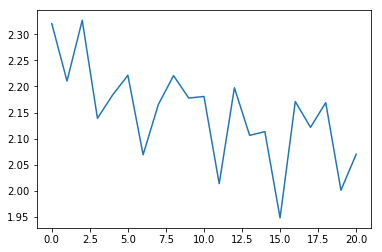

In [182]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure()
plt.plot(all_losses)
plt.show()

In [ ]:
max_length = 100


def sample(start, temp):
    rnn.eval()
    hidden = rnn.initHidden()

    start_input = Variable(text2input(start, df, df.columns[8]))
    if len(start_input) > 1:
        for i in range(len(start_input) - 1):
            output, hidden = rnn(start_input[i], hidden)
            
    input = start_input[-1]
   
    
    output_text = start
    
    for i in range(max_length):
        output, hidden = rnn(input, hidden)
        output_distrib = (output.data.view(-1) / temp).exp()
        
        topi = torch.multinomial(output_distrib, 1)[0]
        #topi = output.data.topk(1)[1][0][0]
        if topi == len(char_vect):
            print("STOP")
            break
        else:
            char = char_vect[topi]
            output_text += char
            input = Variable(text2input(char, df, df.columns[8]))
    return output_text

# Get multiple samples from one category and multiple starting letters
def samples():
    print(sample())
    
#print(df[df.columns[8]][1])
print(sample("L", 0.2)) 

armée de terre (de participer à la préparation des profs pour les stagiaires de la compagnie de combat de l'armée de terre d'autre part.

Le stage est très intéressant et participer à la préparation de l'armée de terre a été très intéressant et de faire des choses intéressantes et il y a moyen de se faire des vols en hélicoptère, de participer à la préparation des cours de maths et de sauter les profs et de la montagne (le stage de commandement de la gendarmerie de la Marine (surtout le plus de choses que les connaissances sont très accueillants et de travailler de son cas pour les préparer des choses intéressantes. De plus il y a moyen de faire de l'instruction et de l'armée de terre d'autre part, de la montagne (et de la programmation de l'armée de terre a été dépaysant et de rencontrer des personnes de l'armée de terre pour les autres aspirants.

Le stage est très intéressant et participer à la préparation d'un exercice de commandement de l'armée de terre (donner des cours de maths et de partir en mission de l'armée de terre (donner des cours de maths et de sauter une semaine de ski ou une semaine de ski...)

In [112]:
import cPickle

file = open("char_rnn_memorix_v1", "wb")
pickle.dump(rnn, file)

file_to_load = open("char_rnn_memorix_v1", "rb")
rnn = cPickle.load(file_to_load)

In [184]:
def train(input_line_tensor, target_line_tensor):
    hidden = rnn.initHidden()
    optimizer.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size()[0]):
        output, hidden = rnn(input_line_tensor[i], hidden)

        loss += criterion(output, target_line_tensor[i])

            

    loss.backward()
    optimizer.step()


    return output, loss.data[0] / input_line_tensor.size()[0]

In [195]:
## WARNING : may not work for multiple layers
def visualize(rnn, input_tensor, neurons):
    hidden = rnn.initHidden()
    activation_list = [[] for i in range(len(neurons))]
    for i in range(input_tensor.size()[0]):
        former_hidden = hidden
        output, hidden = rnn(input_tensor[i], hidden)
        #TO DO : cut the tensors
        W_igate = rnn.lstm.weight_ih_l0
        W_hgate = rnn.lstm.weight_hh_l0
        b_igate = rnn.lstm.bias_ih_l0
        b_hgate = rnn.lstm.bias_hh_l0 
        input_part = torch.mm(W_igate, input_tensor[i].view(-1, 1)) + b_igate
        hidden_part = Variable(torch.from_numpy(np.dot(W_hgate.data.numpy(), former_hidden[0].data.view(-1, 1).numpy())))
        for i, neuron in enumerate(neurons): 
            activation = F.sigmoid(input_part + hidden_part)[neuron["index"]]
            activation_list[i].append(activation.data.numpy()[0])
    return input_tensor, activation_list
            
    
index = random.randint(0, len(df[df.columns[8]]) - 1)
text = df[df.columns[8]][index]
print(text)
input_tensor = text2input(text, df, df.columns[8])
neurons = [{"gate":0, "layer":1, "index":6} for i in range(50)]
for i in range(len(neurons)):
    neurons[i]["index"] = i
activation_list = visualize(rnn, trainingExample(df, df_column=df.columns[8])[0], neurons)[1]

Super stage. L\'avantage de prendre la spécialisation passerelle c\'est que le premier poste que l\'on occupe est adjoint du chef du quart (voire chef du quart directement). Le chef du quart c\'est celui qui conduit le bateau. Mais c\'est aussi sur lui que convergent toutes les informations. Ainsi en étant en passerelle, on a une réelle vision d\'ensemble en on peut ensuite aller là où ça nous intéresse. Pour ma part j\'ai ensuite passé pas mal de temps au CO (salle des opérations, dans le noir avec des consoles partout, etc). Il y a des exercices en continu (24h/24) et il y a des phases très intenses ou ça sonne, ça cri dans tous les sens, où le commandant arrive en courant : \"c\'est bon ? on a chopé le sous-marin ?\", etc. C\'est très excitant de suivre l\'action. Je recommande vraiment ce stage !
Vers la fin du stage, on m\'a demandé de programmer un logiciel (on était à quai, on ne naviguait plus) qui m\'a pris beaucoup, beaucoup de temps. Mais c\'est passionnant et je continue to

0.14252697

In [144]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python2.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['sample', 'text']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Super_stage._L\'avantage_de_prendre_la_spécialisation_passerelle_c\'est_que_le_premier_poste_que_l\'on_occupe_est_adjoint_du_chef_du_quart_(voire_chef_du_quart_directement)._Le_chef_du_quart_c\'est_celui_qui_conduit_le_bateau._Mais_c\'est_aussi_sur_lui_que_convergent_toutes_les_informations._Ainsi_en_étant_en_passerelle,_on_a_une_réelle_vision_d\'ensemble_en_on_peut_ensuite_aller_là_où_ça_nous_intéresse._Pour_ma_part_j\'ai_ensuite_passé_pas_mal_de_temps_au_CO_(salle_des_opérations,_dans_le_noir_avec_des_consoles_partout,_etc)._Il_y_a_des_exercices_en_continu_(24h/24)_et_il_y_a_des_phases_très_intenses_ou_ça_sonne,_ça_cri_dans_tous_les_sens,_où_le_commandant_arrive_en_courant_:_\"c\'est_bon_?_on_a_chopé_le_sous-marin_?\",_etc._C\'est_très_excitant_de_suivre_l\'action._Je_recommande_vraiment_ce_stage_!
Vers_la_fin_du_stage,_on_m\'a_demandé_de_programmer_un_logiciel_(on_était_à_quai,_on_ne_naviguait_plus)_qui_m\'a_pris_beaucoup,_beaucoup_de_temps._Mais_c\'est_passionnant_et_je_continue_to

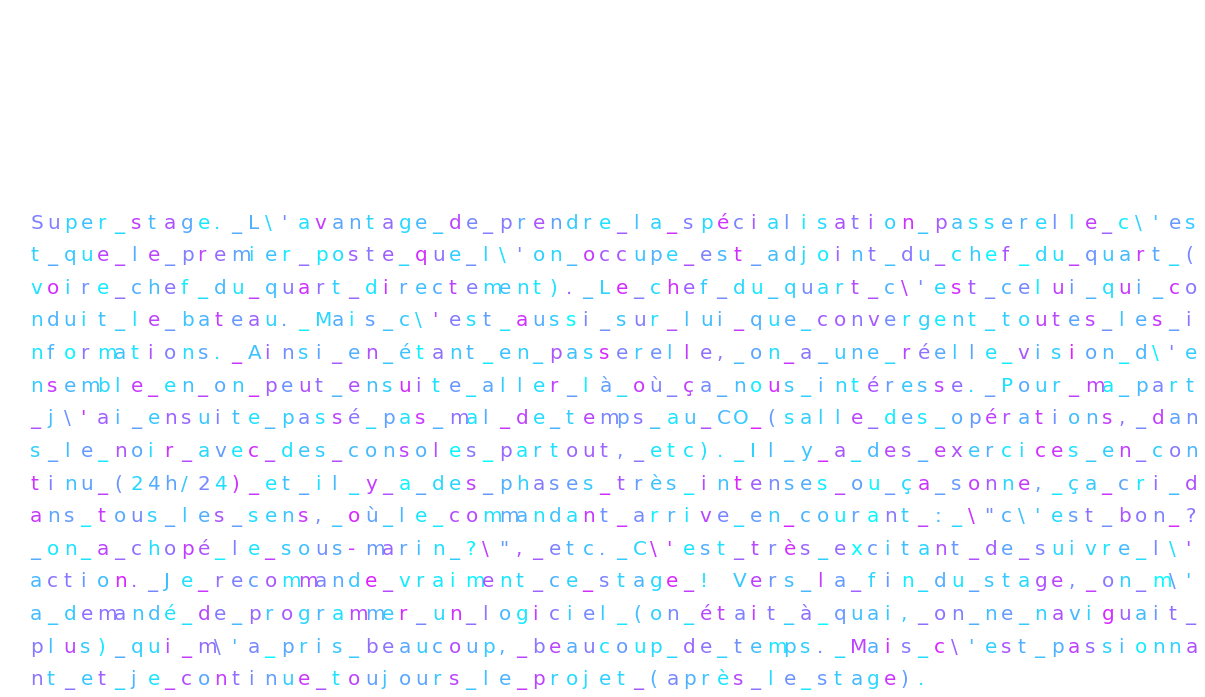

In [197]:
import matplotlib.pyplot as plt
from matplotlib import cm

def show_space(text):
    new_text = ""
    for letter in text:
        if letter == " ":
            new_text += "_"
        else:
            new_text += letter
    return new_text

def text_color_map(text, value_list):
    char_limit = 70
    x_scale = 12
    y_scale = 10
    plt.figure(figsize=(x_scale, y_scale))
    plt.axis("off")
    letter_size = 20
    reset_corrector = 0
    y_default_pos = 10
    for i in range(len(text)):
        letter = text[i]
        value = value_list[i]
        x_pos = (i - reset_corrector)  * 1E-2 * 1.5 * letter_size / x_scale
        y_pos = y_default_pos * 3E-2 *  letter_size / y_scale
        if i - reset_corrector < char_limit:
            plt.text(x_pos , y_pos, letter, size = letter_size, color = cm.cool(value))
        else:
            reset_corrector = i
            y_default_pos -= 1
            x_pos = 0
            y_pos = y_default_pos * 3E-2 *  letter_size / y_scale
            plt.text(x_pos , y_pos, letter, size = letter_size, color = cm.cool(value))
    
print(show_space(text))
text_color_map(show_space(text), activation_list[0])

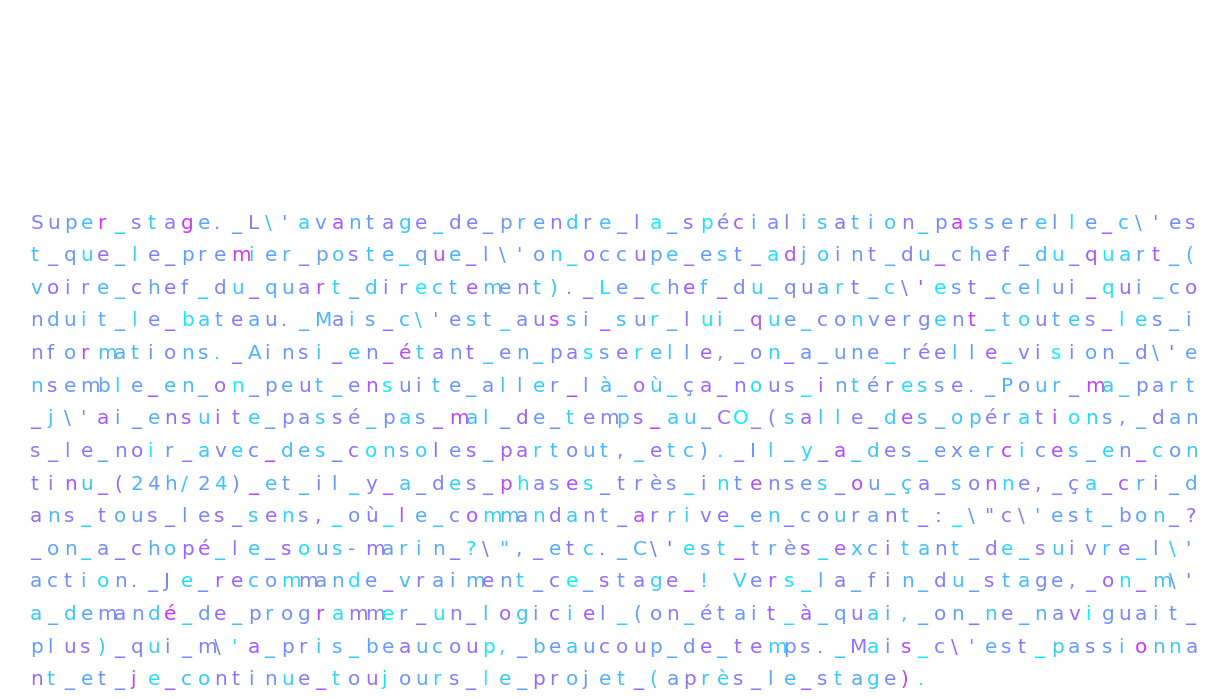

In [198]:
text_color_map(show_space(text), activation_list[1])

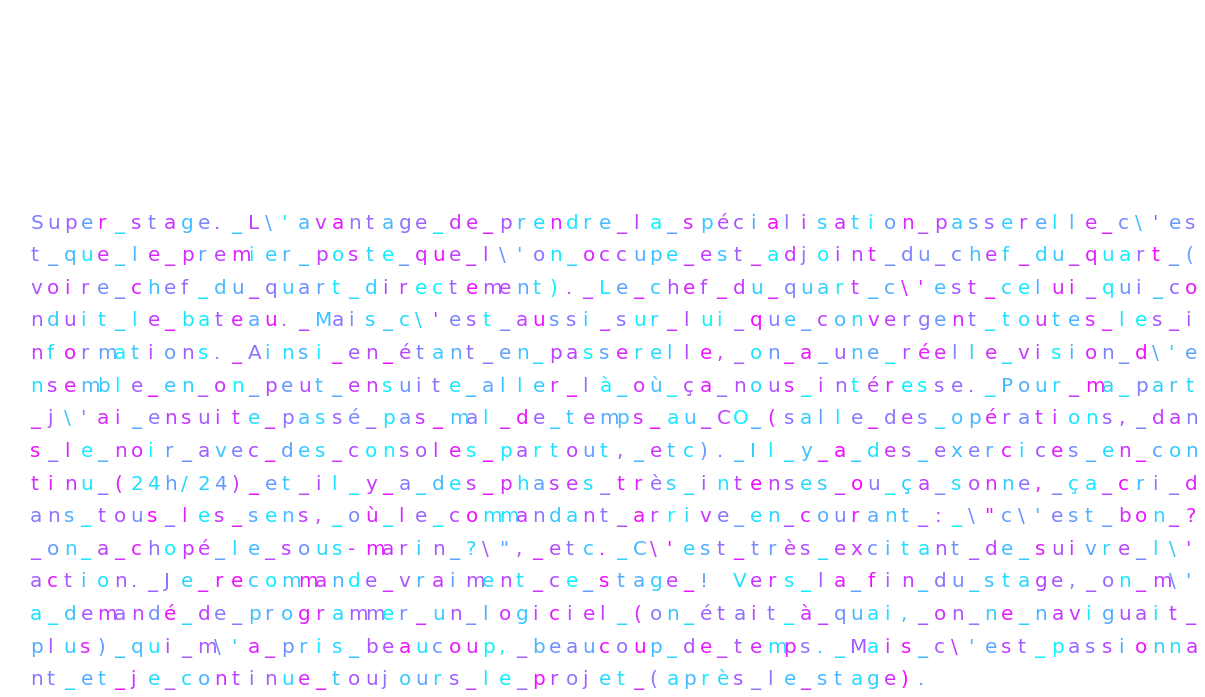

In [205]:
text_color_map(show_space(text), activation_list[8])